In [44]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp
import glob
import os
from omegaconf import OmegaConf

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('bmh')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'

In [3]:
def load_run(run_dir, ty):
    df = pd.read_csv(os.path.join(run_dir, f'{ty}.csv'))
    run_id = run_dir.split('/')[-1]
    df['run_id'] = f'run={run_id}'
    overrides = OmegaConf.load(os.path.join(run_dir, '.hydra', 'overrides.yaml'))
    for override in overrides:
        key = override.split('=')[0]
        value = '='.join(override.split('=')[1:])
        df[key] = value
    return df

def load_experiment(exp_dirs, ty='eval'):
    run_dirs = []
    for exp_dir in exp_dirs:
        run_dirs += glob.glob(os.path.join(exp_dir, '*'))
    
    dfs = []
    for run_dir in run_dirs:
        try:
            df = load_run(run_dir, ty)
            dfs.append(df)
        except:
            pass
        
    return pd.concat(dfs, sort=False)

In [4]:
def plot(df,  key='episode_reward'):
    envs = ['cube']
    ncol = 1
    nrow = 1
    fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))

    #runs = sorted([str(x) for x in df.run.unique()])

    for idx, env in enumerate(envs):
        data = df##df[df['env'] == env]
        row = idx // ncol
        col = idx % ncol
        ax = axs
        hue_order = np.sort(data.Agent.unique())
        #import ipdb; ipdb.set_trace()
        sns.lineplot(x='step', y=key, data=data, ci='sd', hue='Agent', hue_order=hue_order, ax=ax)
        #sns.lineplot(x='step', y=key, data=data, ci='sd', hue='run_id', ax=ax, palette=sns.color_palette('Blues')[3:4])
        
        ax.set_title(f'{env}')
        #ax.set_xlim(0, 10000000)
        #ax.set_ylim(0.0, 1050.0)
        #ax.legend_.remove()
        
    plt.tight_layout()
    plt.show()

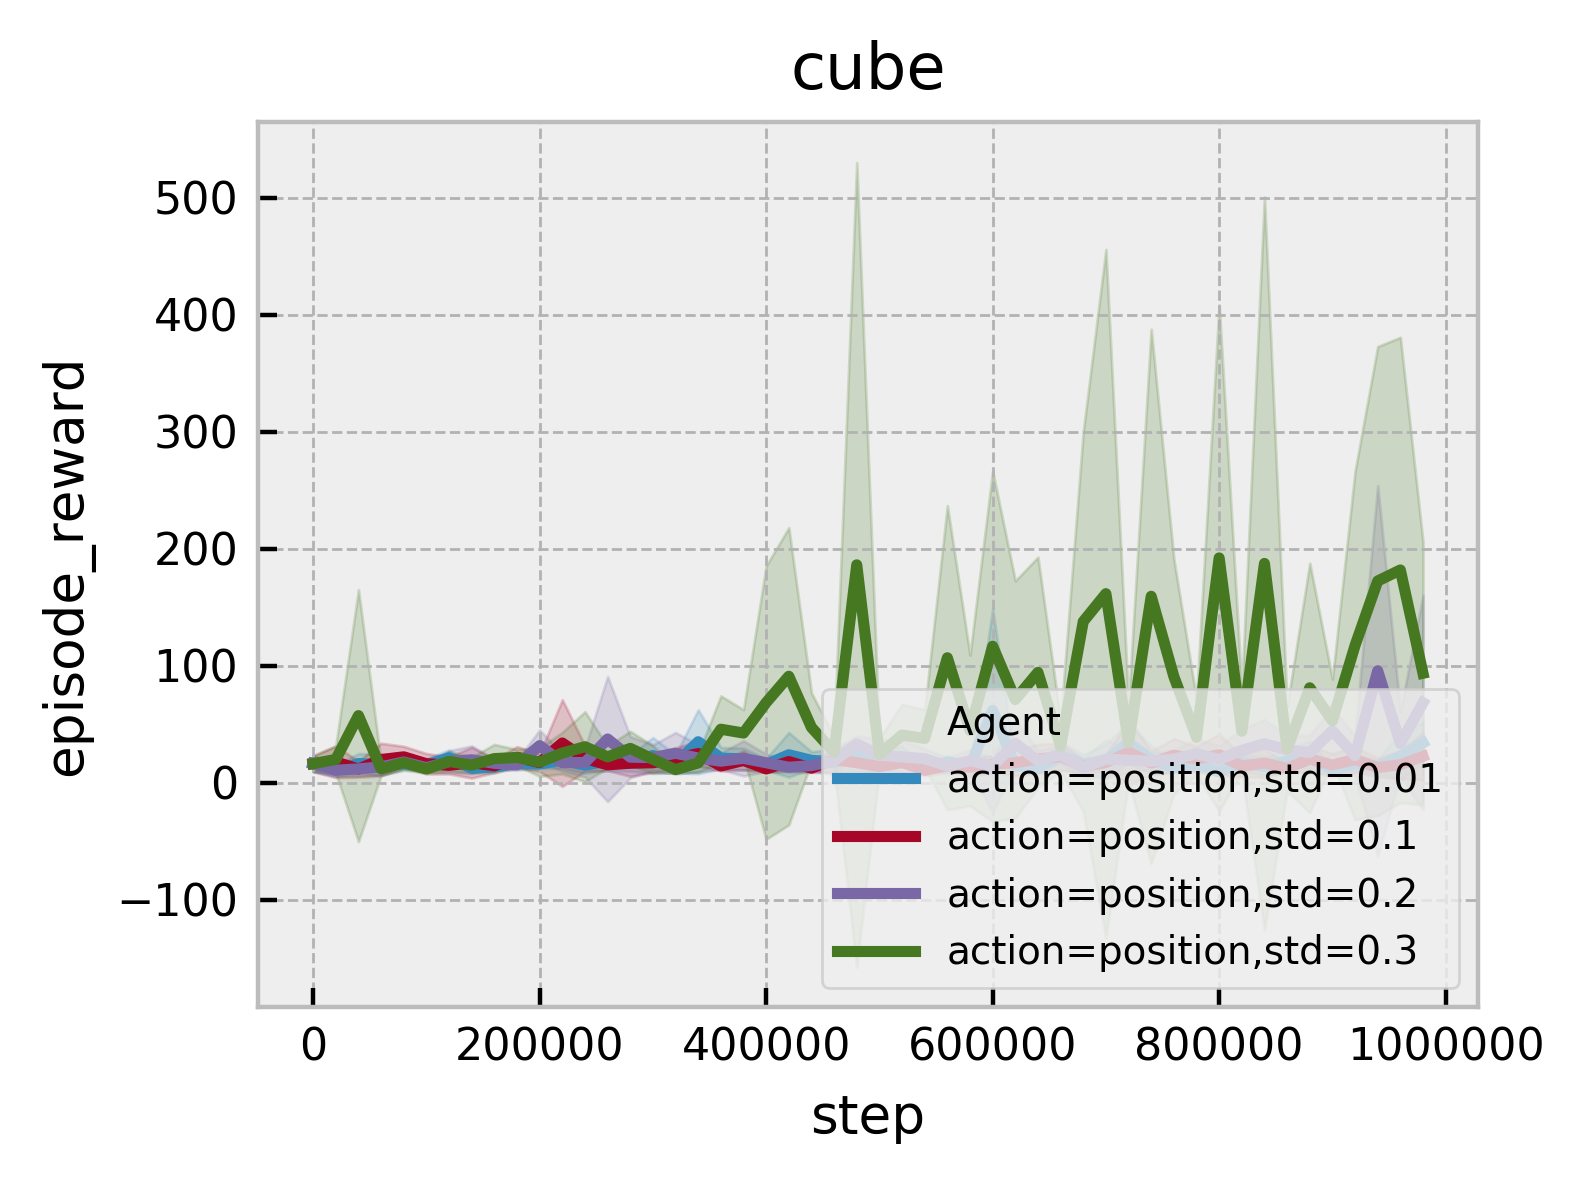

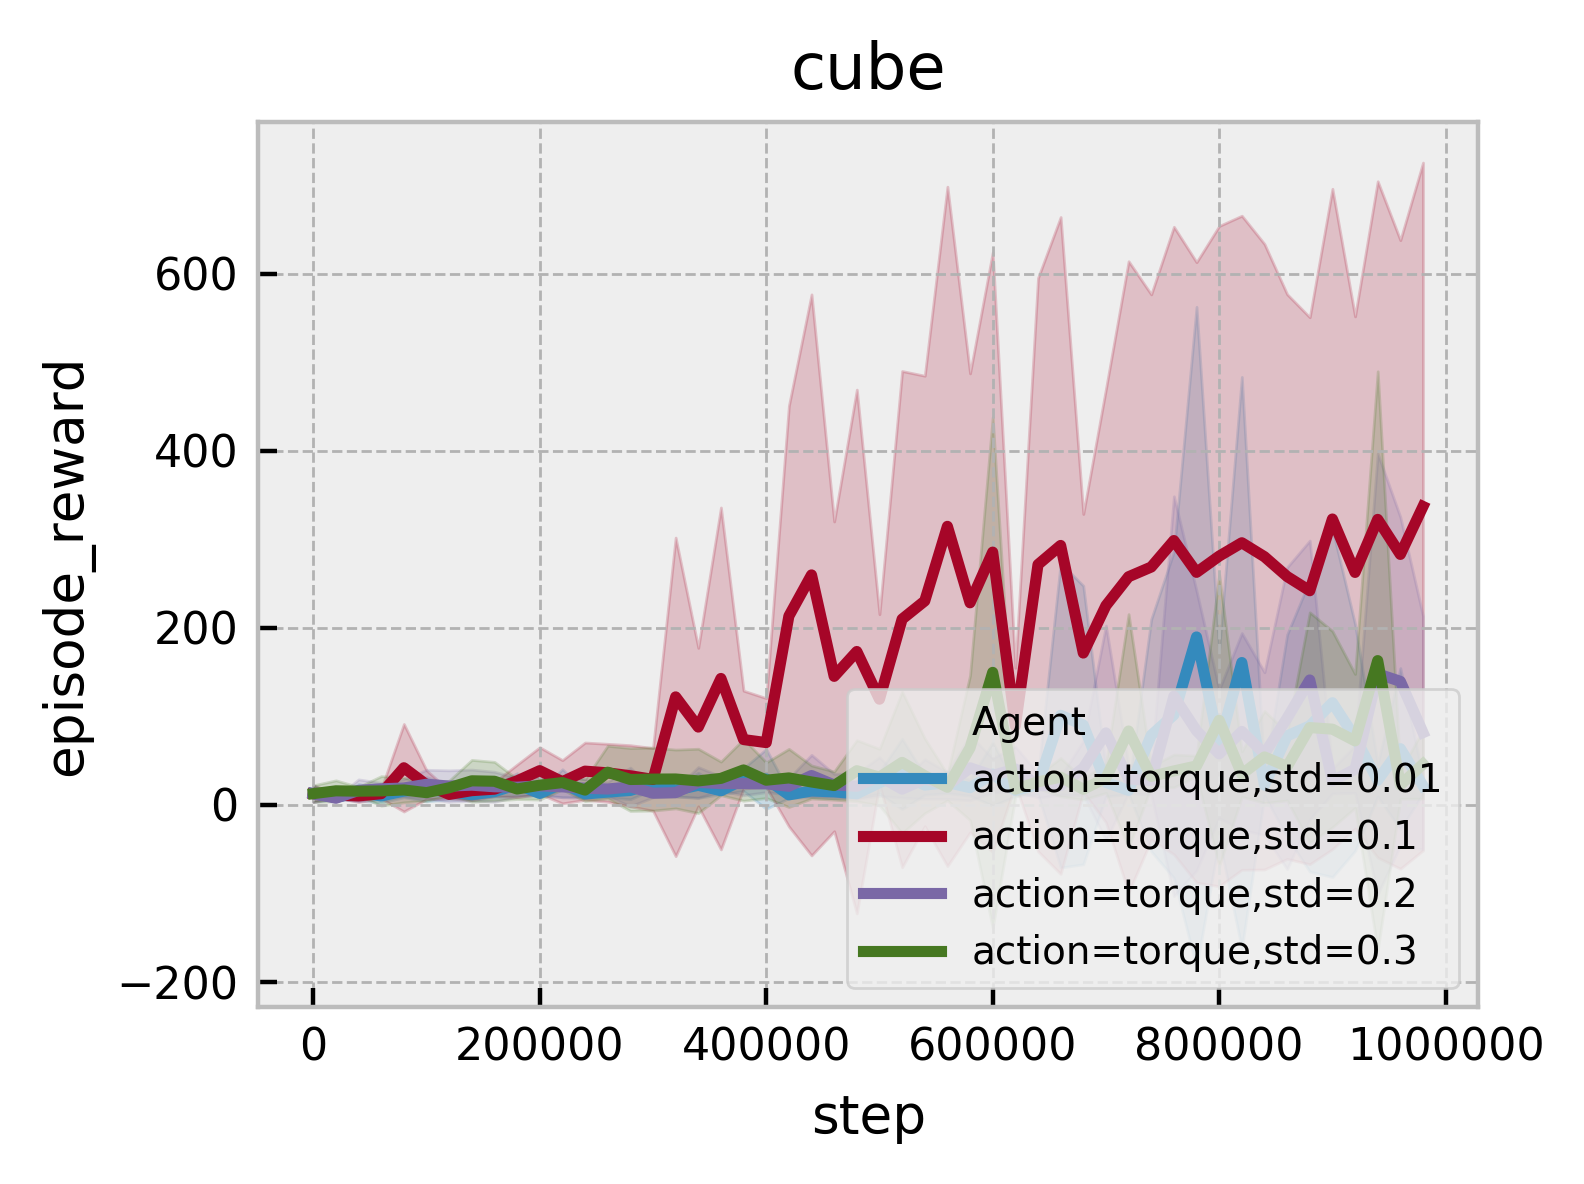

In [27]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/150710_ddpg_cube',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


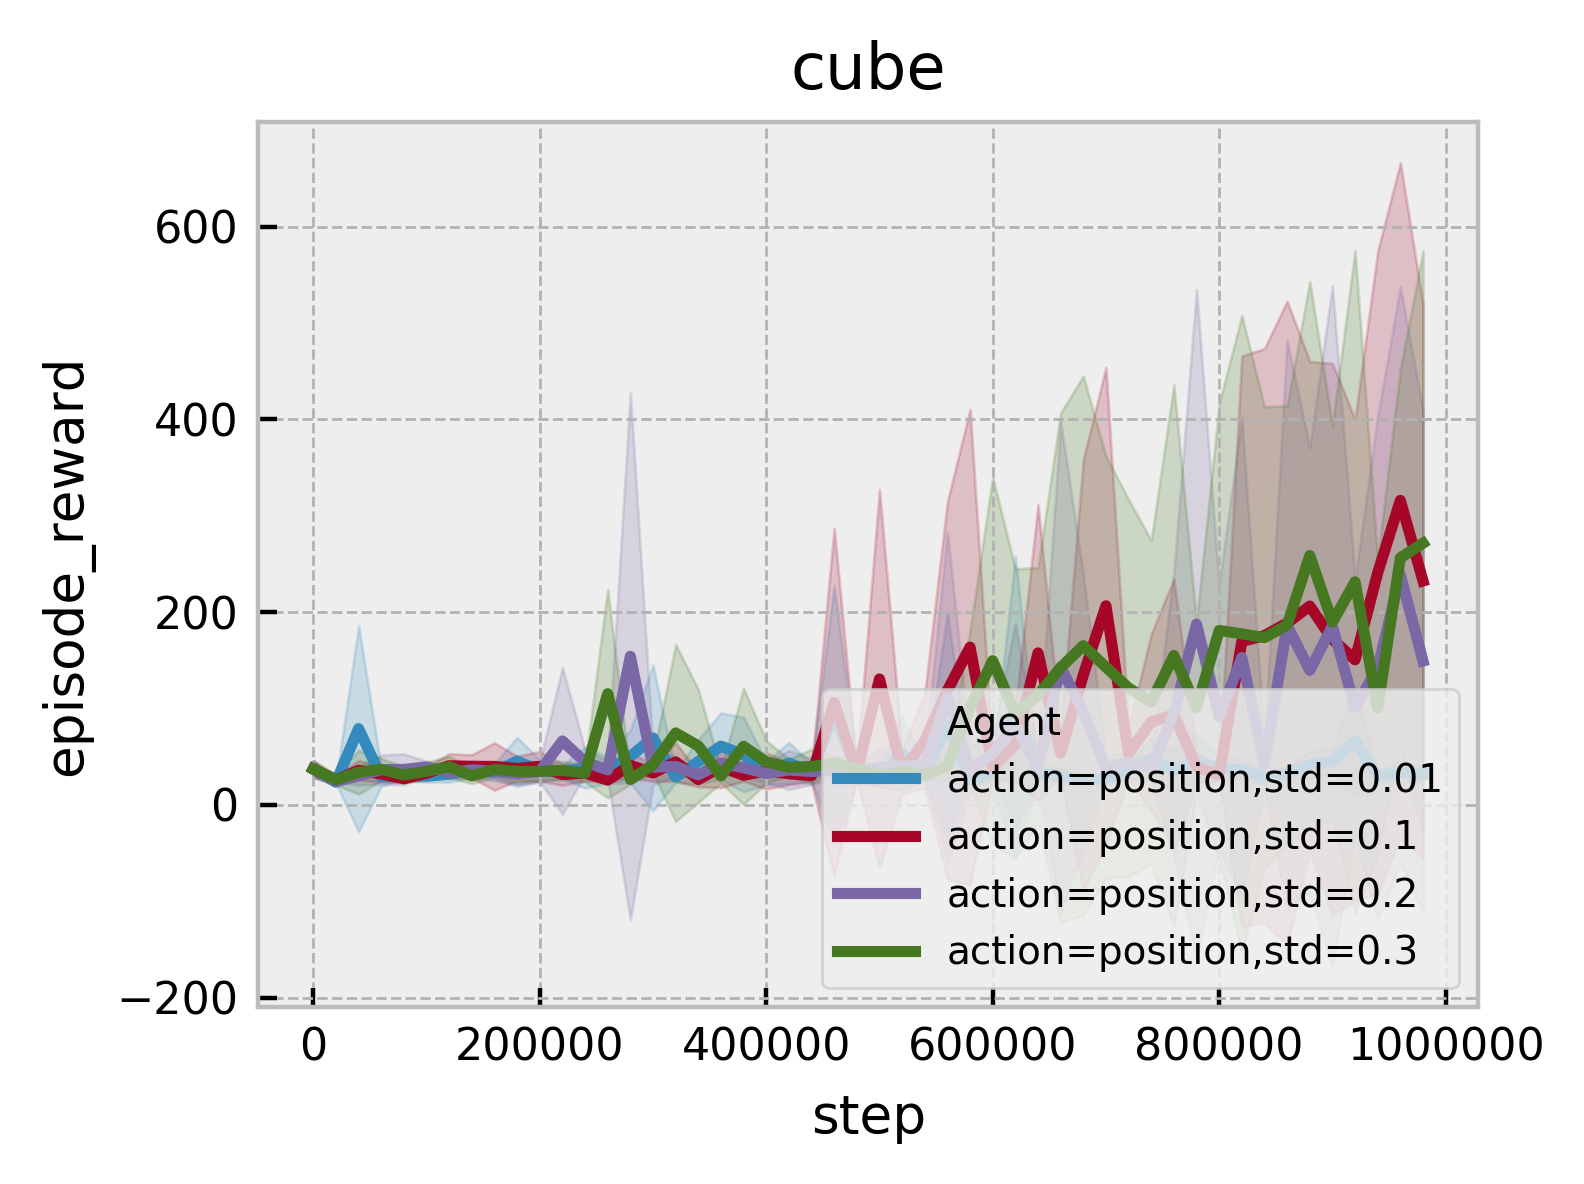

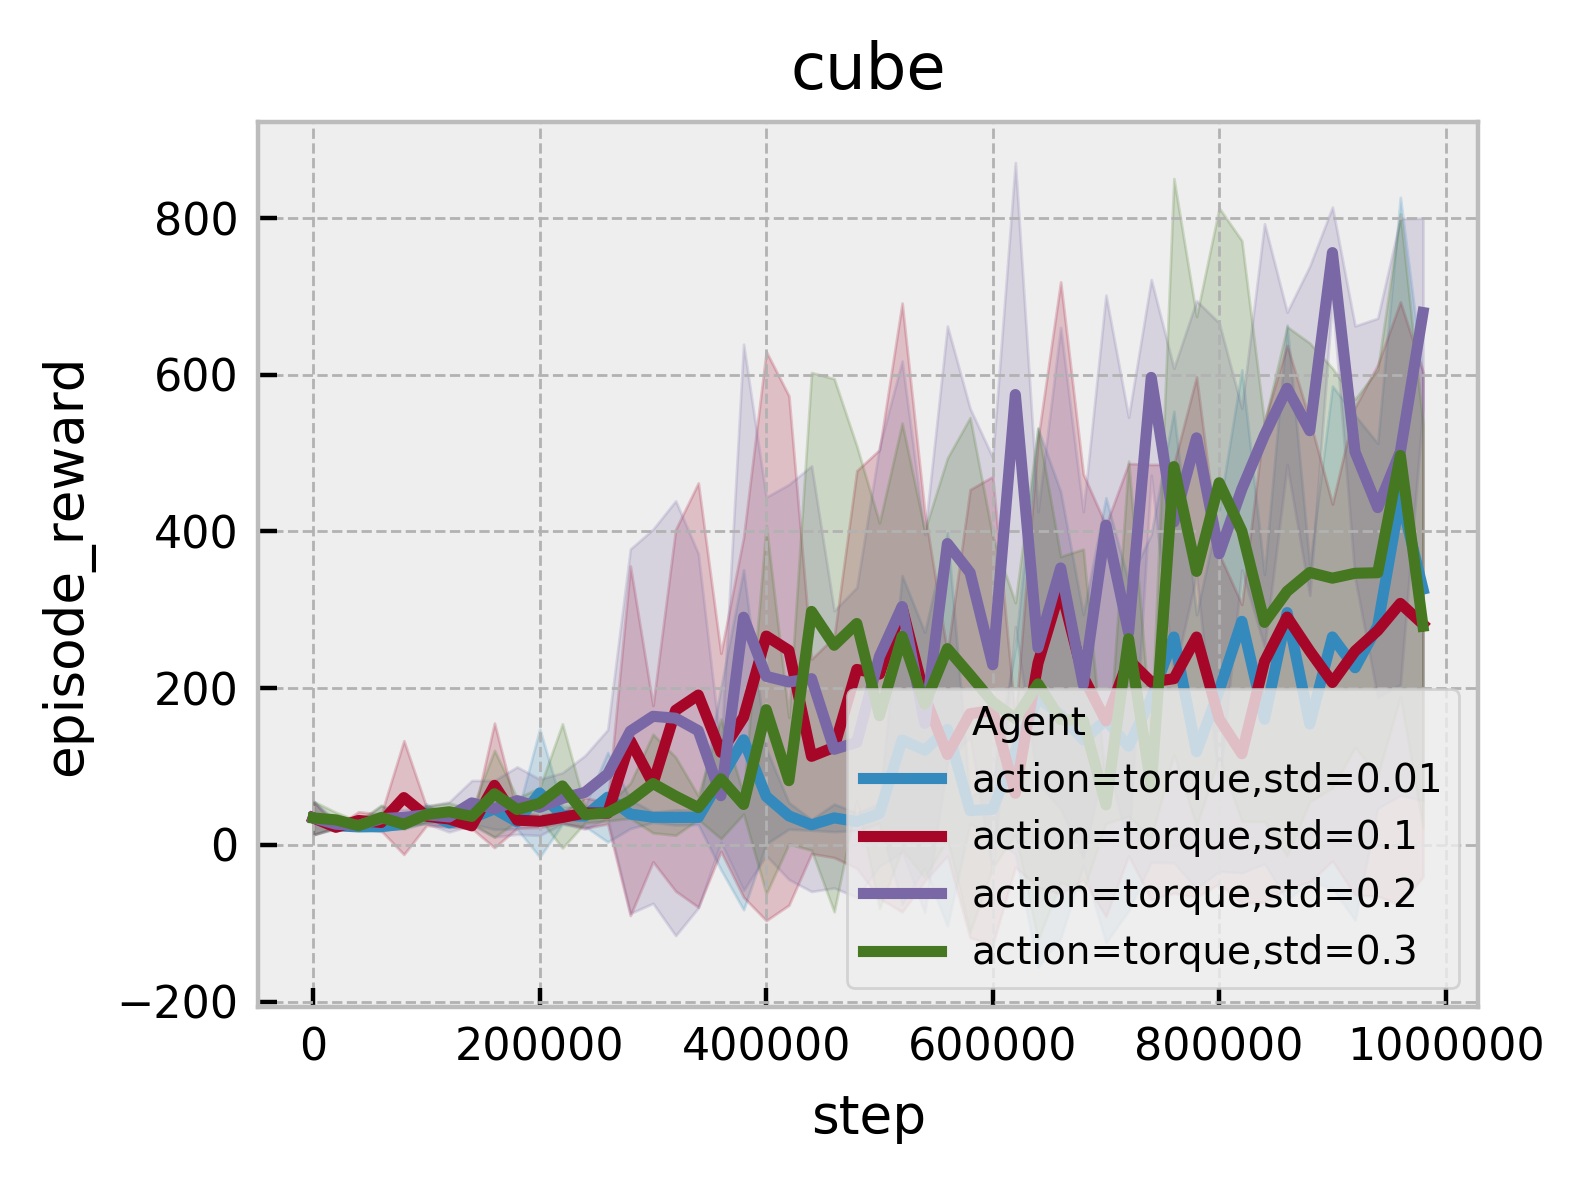

In [28]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/161429_ddpg_no_away',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


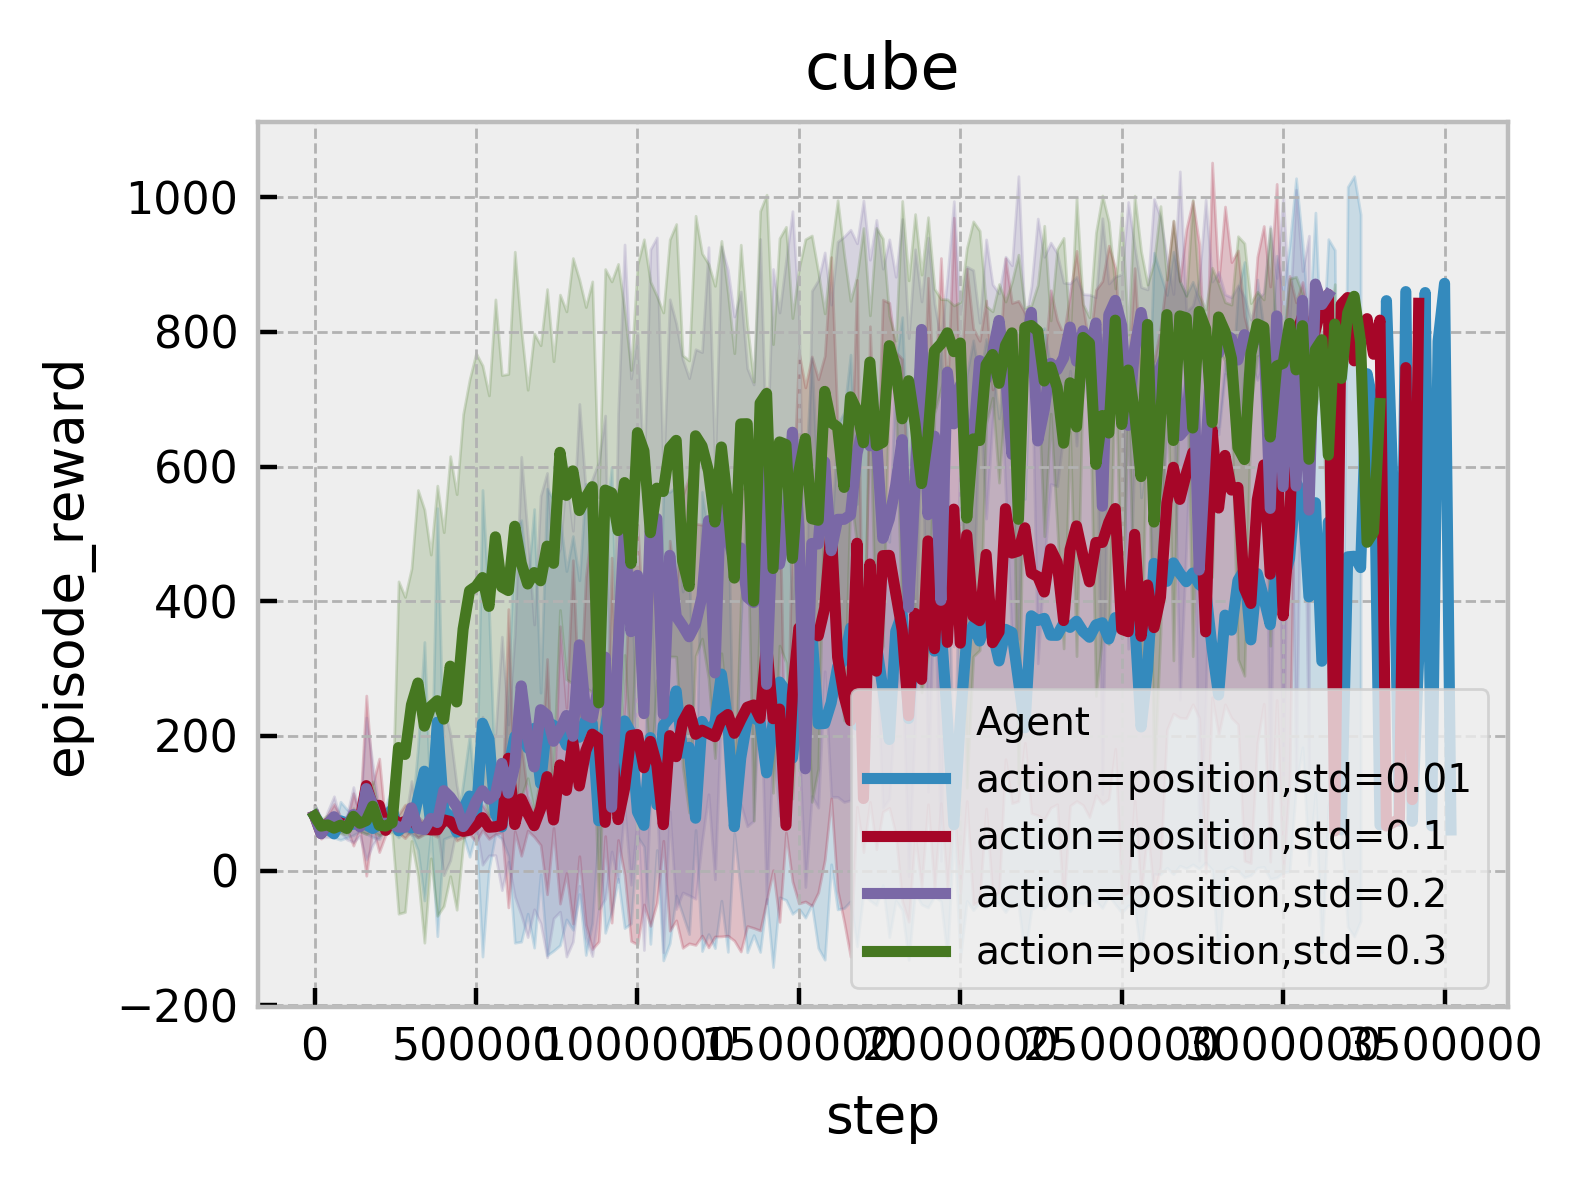

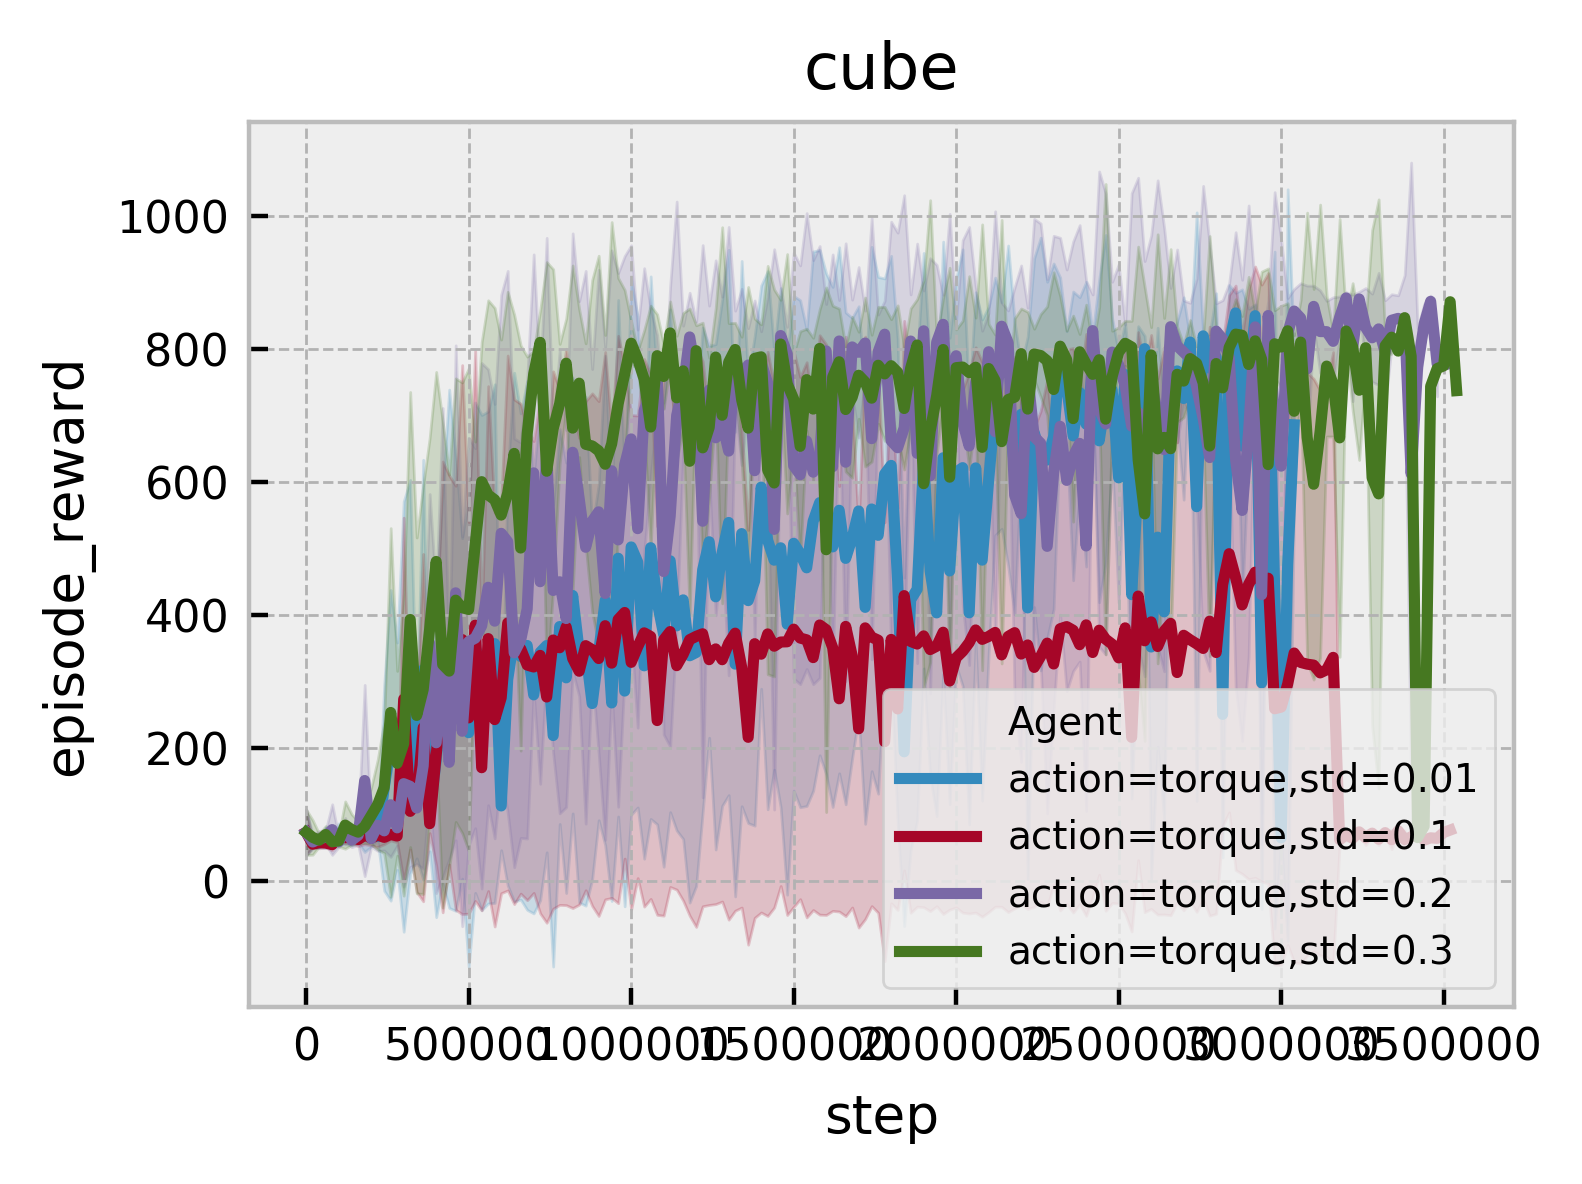

In [36]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/191743_ddpg_val_at_margin',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


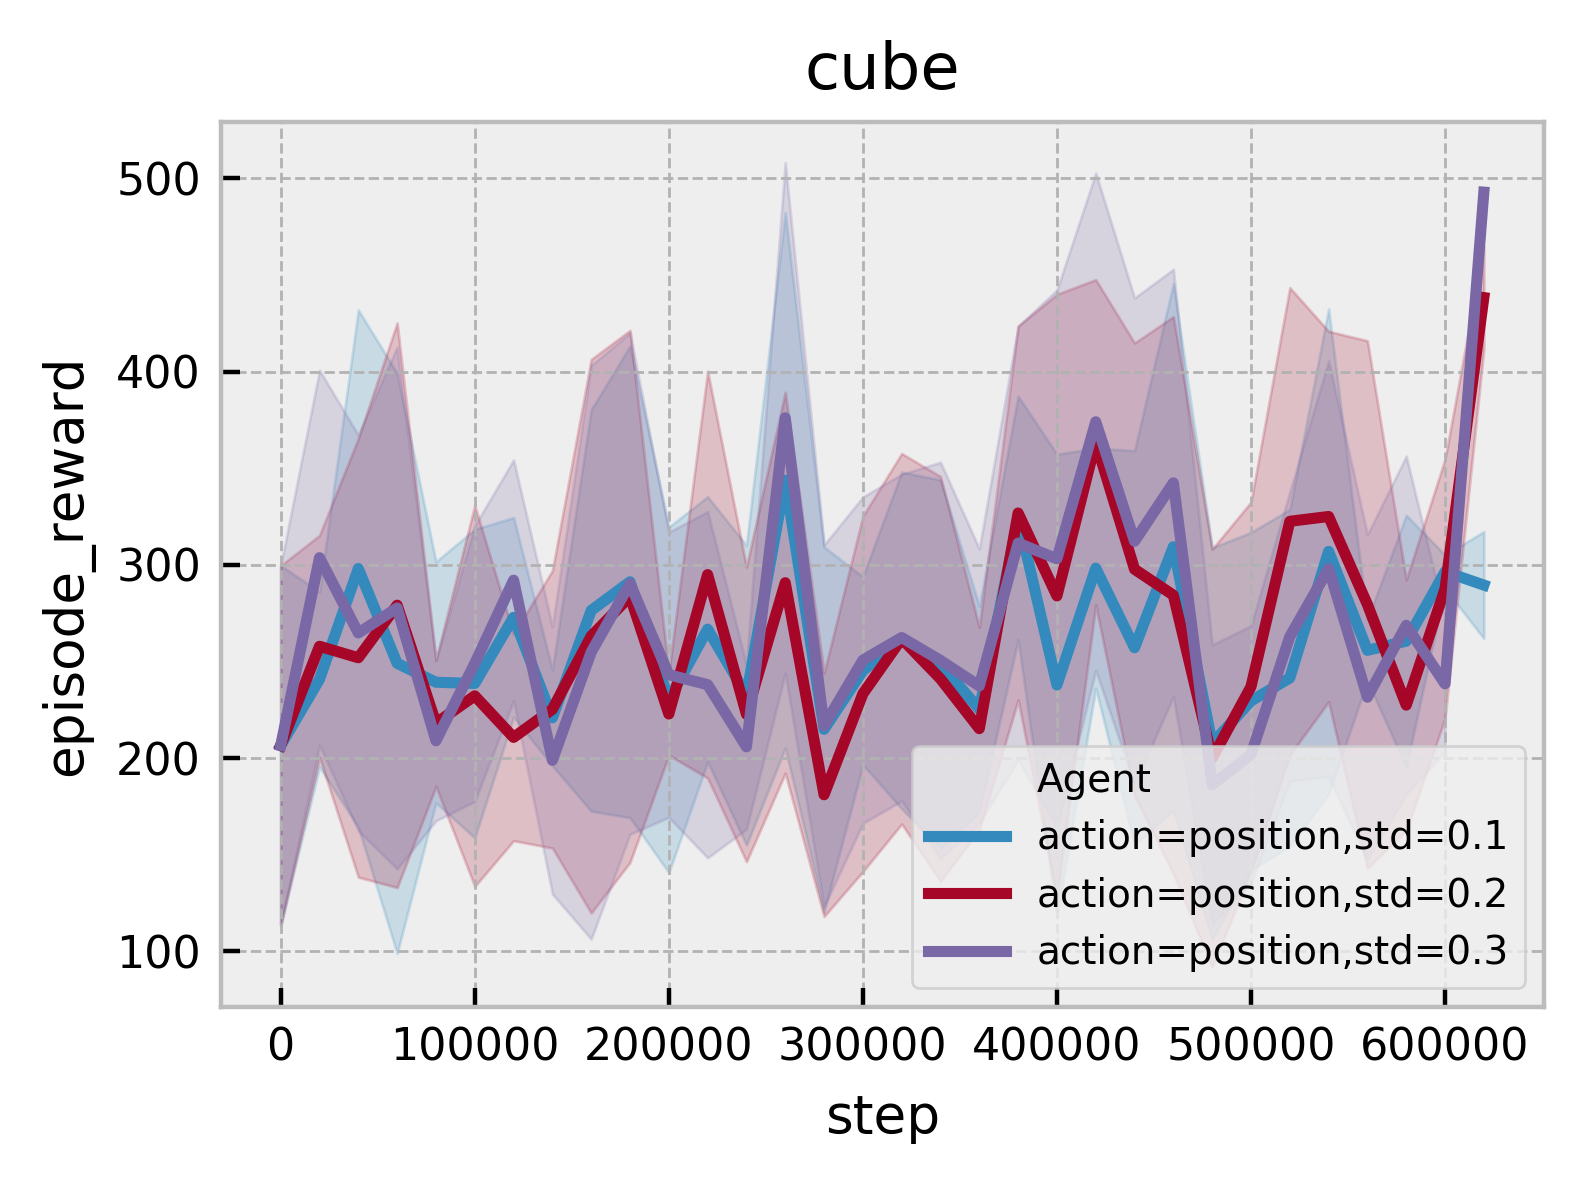

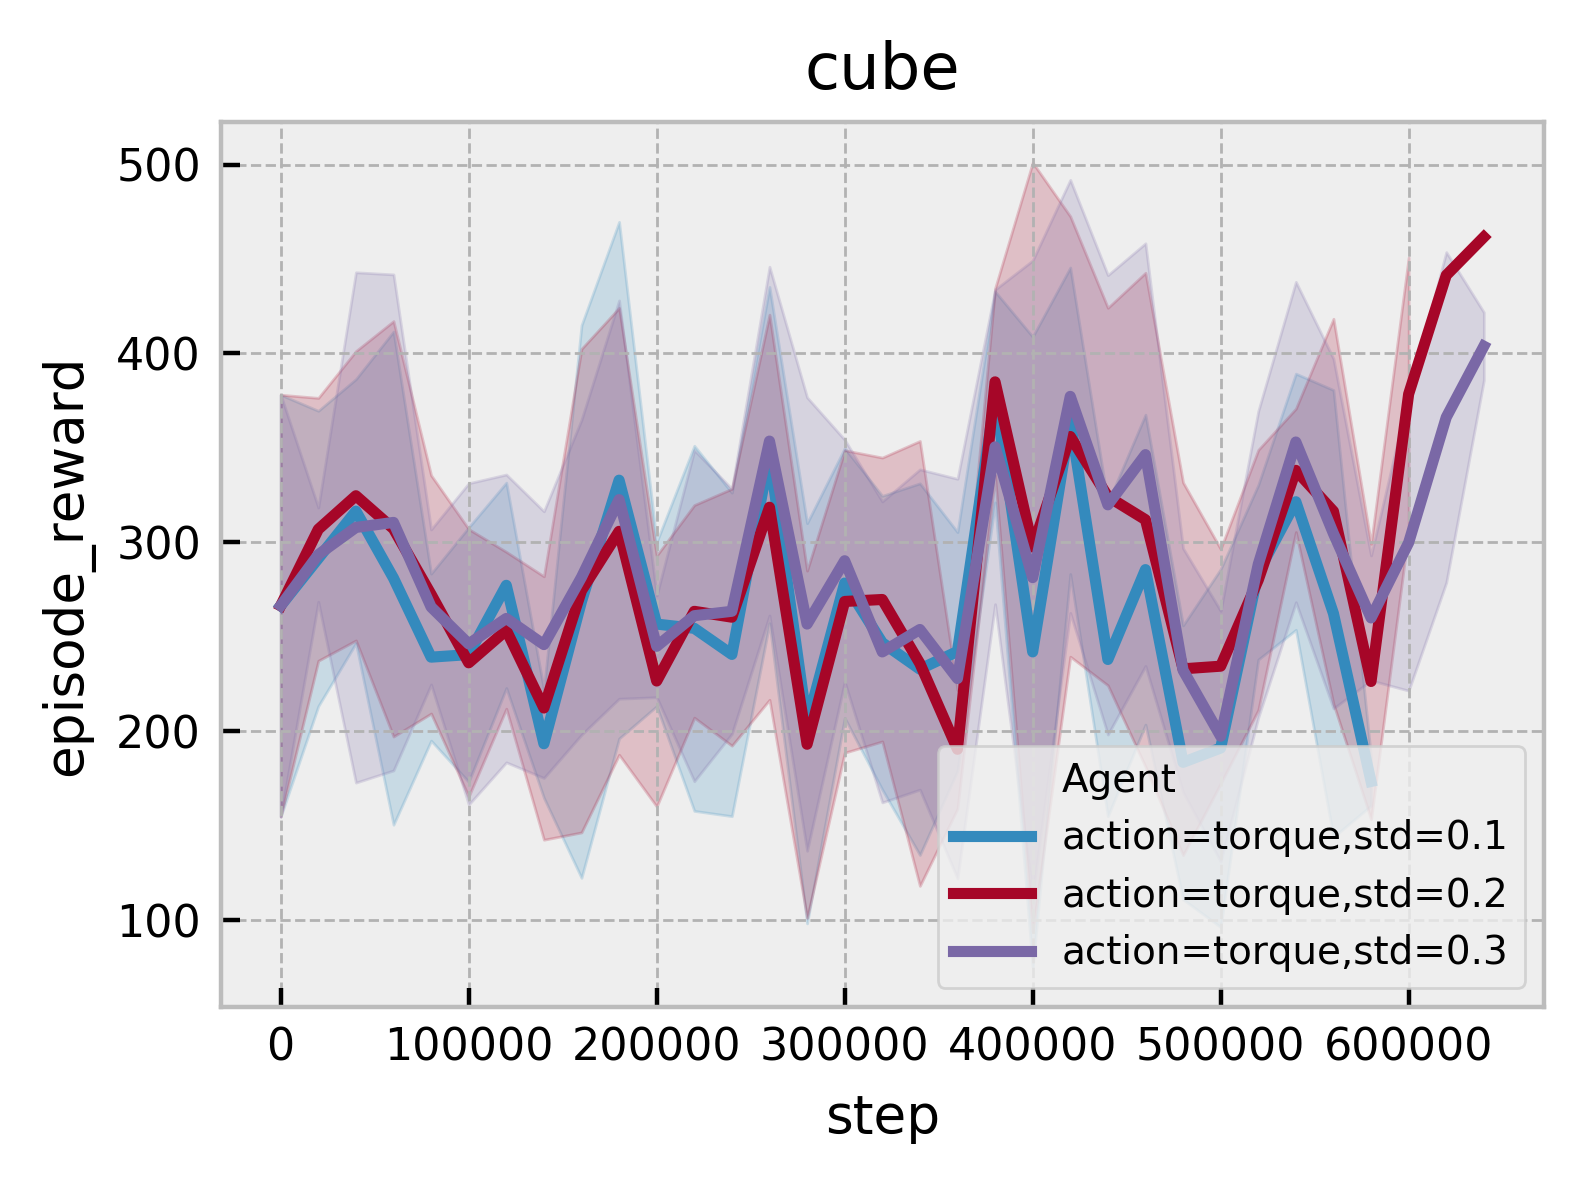

In [41]:
dfs = []

exp_dirs = [
    '../exp/2020.08.14/110903_ddpg_cube_random_goals',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


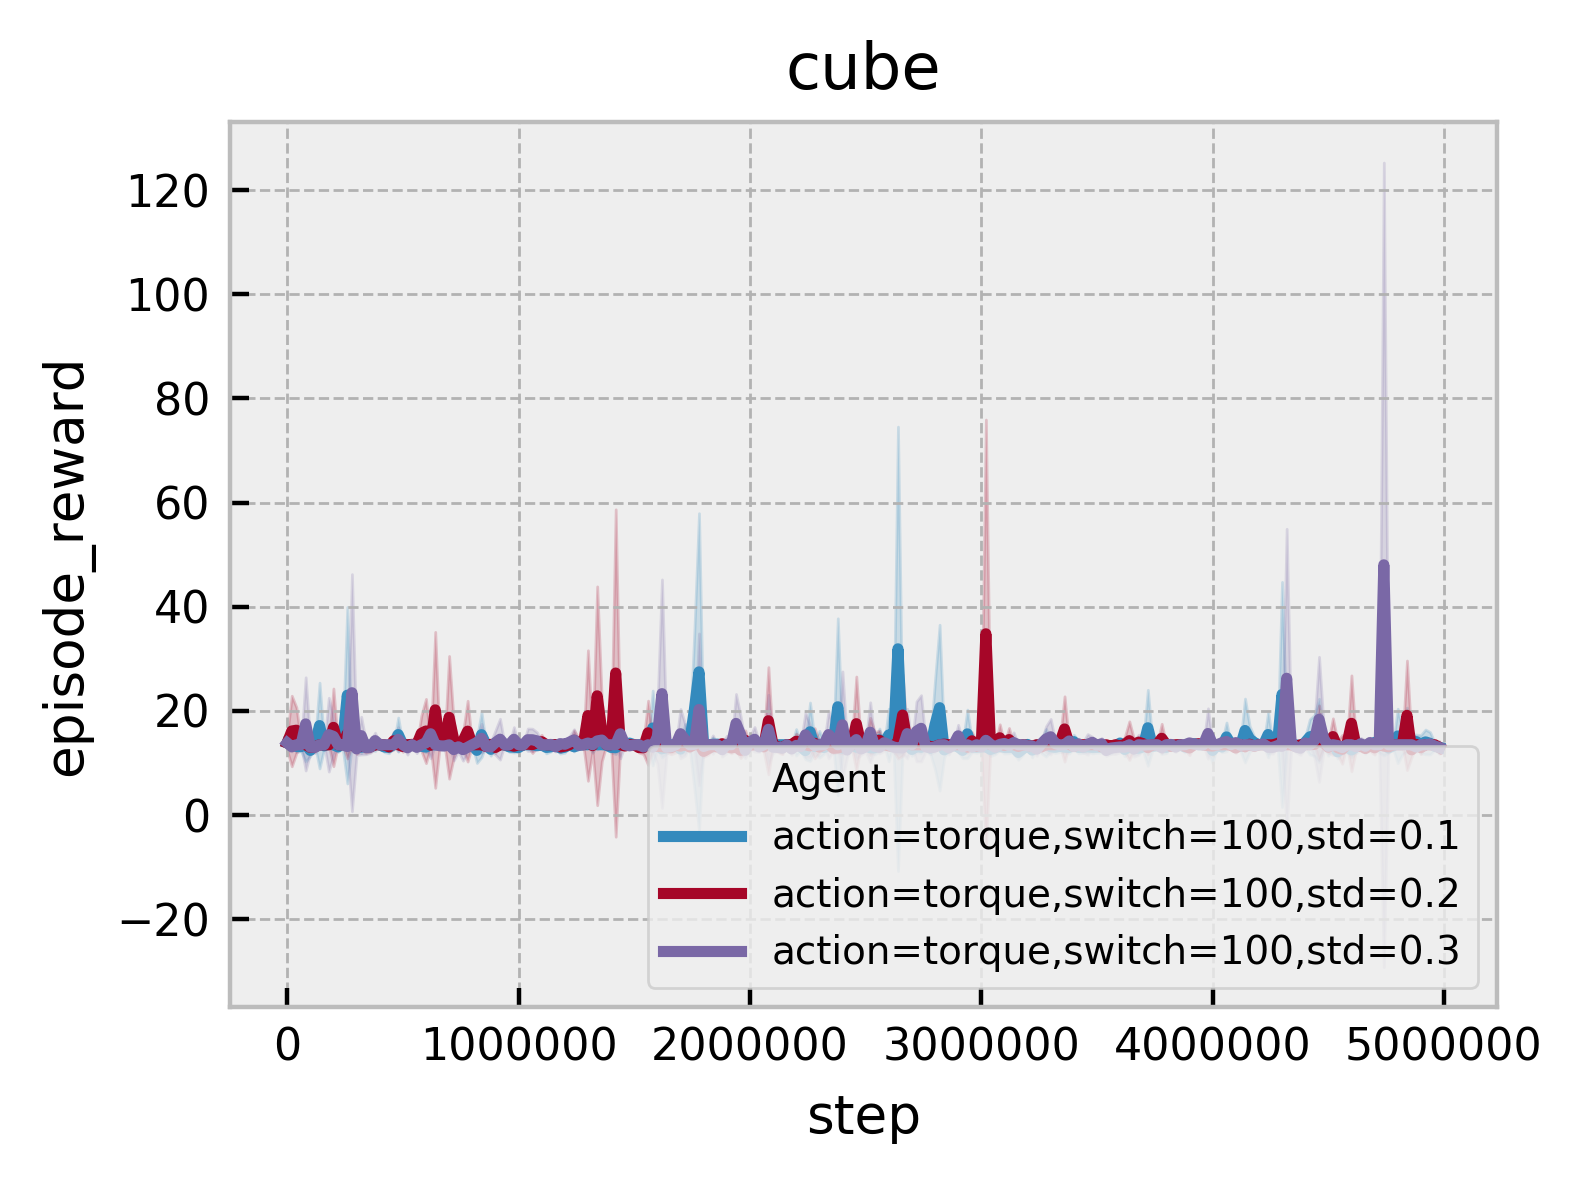

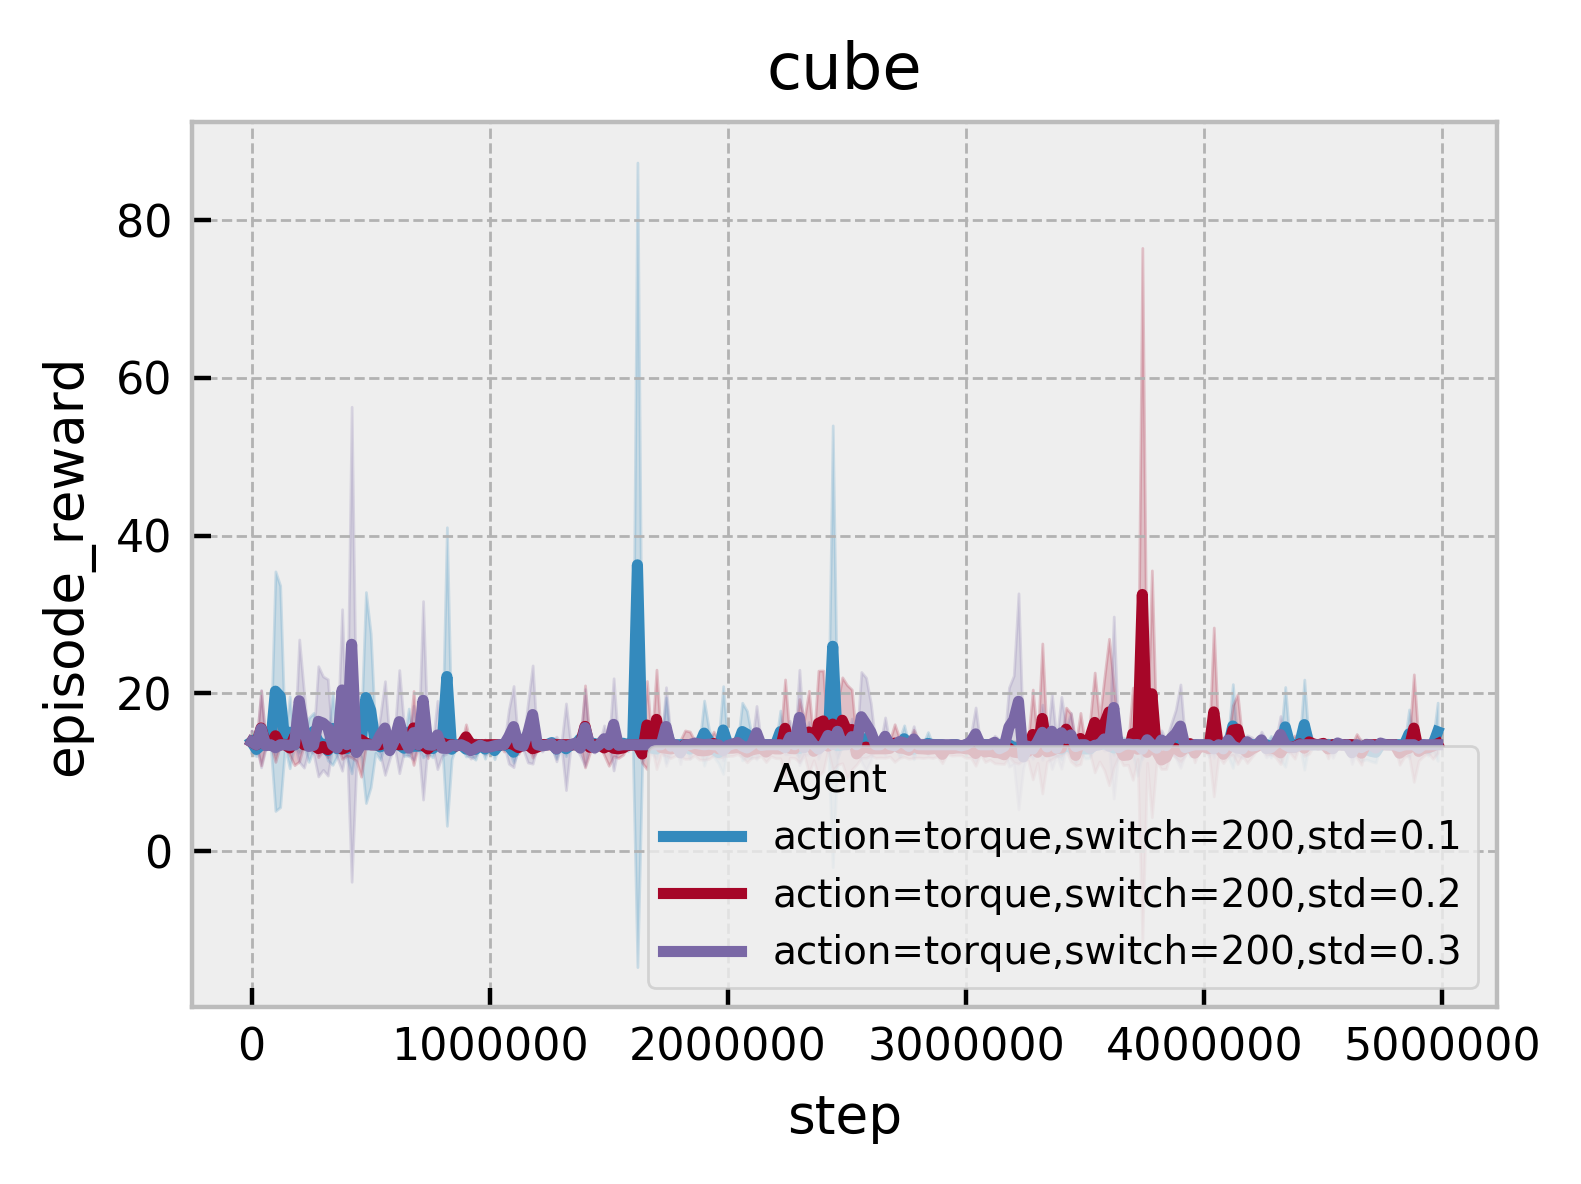

In [45]:
dfs = []

exp_dirs = [
    '../exp/2020.08.14/102120_ddpg_multi_cube',
]

for switch in [100, 200]:
    for aty in ['torque']:
        dfs = []
        for std in [0.1, 0.2, 0.3]:
            df = load_experiment(exp_dirs, ty='eval')
            df = df[df['fixed_env'] == str(True)]
            df = df[(df['switch_task_frequency'] == str(switch)) &(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
            df['Agent'] = f'action={aty},switch={switch},std={std}'
            dfs.append(df)

        df = pd.concat(dfs, sort=False)
        plot(df)


In [39]:
df

episode  episode_length  episode_reward    step  run_id  experiment  \
0       1.0          1000.0       14.484819       0  run=15  multi_cube   
1      21.0          1000.0       13.535419   20000  run=15  multi_cube   
2      41.0          1000.0       13.498806   40000  run=15  multi_cube   
3      61.0          1000.0       13.788726   60000  run=15  multi_cube   
4      81.0          1000.0       14.107674   80000  run=15  multi_cube   
..      ...             ...             ...     ...     ...         ...   
11    221.0          1000.0       43.433466  220000  run=56  multi_cube   
12    241.0          1000.0       59.998300  240000  run=56  multi_cube   
13    261.0          1000.0       98.924488  260000  run=56  multi_cube   
14    281.0          1000.0       69.064472  280000  run=56  multi_cube   
15    301.0          1000.0       64.971545  300000  run=56  multi_cube   

   log_save_tb video_fps         env fixed_env num_train_steps eval_frequency  \
0        false        10  multi_cube      True         5000000          20000   
1        false        10  multi_cube      True         5000000          20000   
2        false        10  multi_cube      True         5000000          20000   
3        false        10  multi_cube      True         5000000          20000   
4        false        10  multi_cube      True         5000000          20000   
..         ...       ...         ...       ...             ...            ...   
11       false        10  multi_cube     False         5000000          20000   
12       false        10  multi_cube     False         5000000          20000   
13       false        10  multi_cube     False         5000000          20000   
14       false        10  multi_cube     False         5000000          20000   
15       false        10  multi_cube     False         5000000          20000   

   num_eval_episodes action_type switch_task_frequency actor_stddev seed  \
0                  5      torque                   200          0.1    1   
1                  5      torque                   200          0.1    1   
2                  5      torque                   200          0.1    1   
3                  5      torque                   200          0.1    1   
4                  5      torque                   200          0.1    1   
..               ...         ...                   ...          ...  ...   
11                 5      torque                   200          0.3    2   
12                 5      torque                   200          0.3    2   
13                 5      torque                   200          0.3    2   
14                 5      torque                   200          0.3    2   
15                 5      torque                   200          0.3    2   

                               Agent  
0   action=torque,switch=200,std=0.1  
1   action=torque,switch=200,std=0.1  
2   action=torque,switch=200,std=0.1  
3   action=torque,switch=200,std=0.1  
4   action=torque,switch=200,std=0.1  
..                               ...  
11  action=torque,switch=200,std=0.3  
12  action=torque,switch=200,std=0.3  
13  action=torque,switch=200,std=0.3  
14  action=torque,switch=200,std=0.3  
15  action=torque,switch=200,std=0.3  

[510 rows x 18 columns]

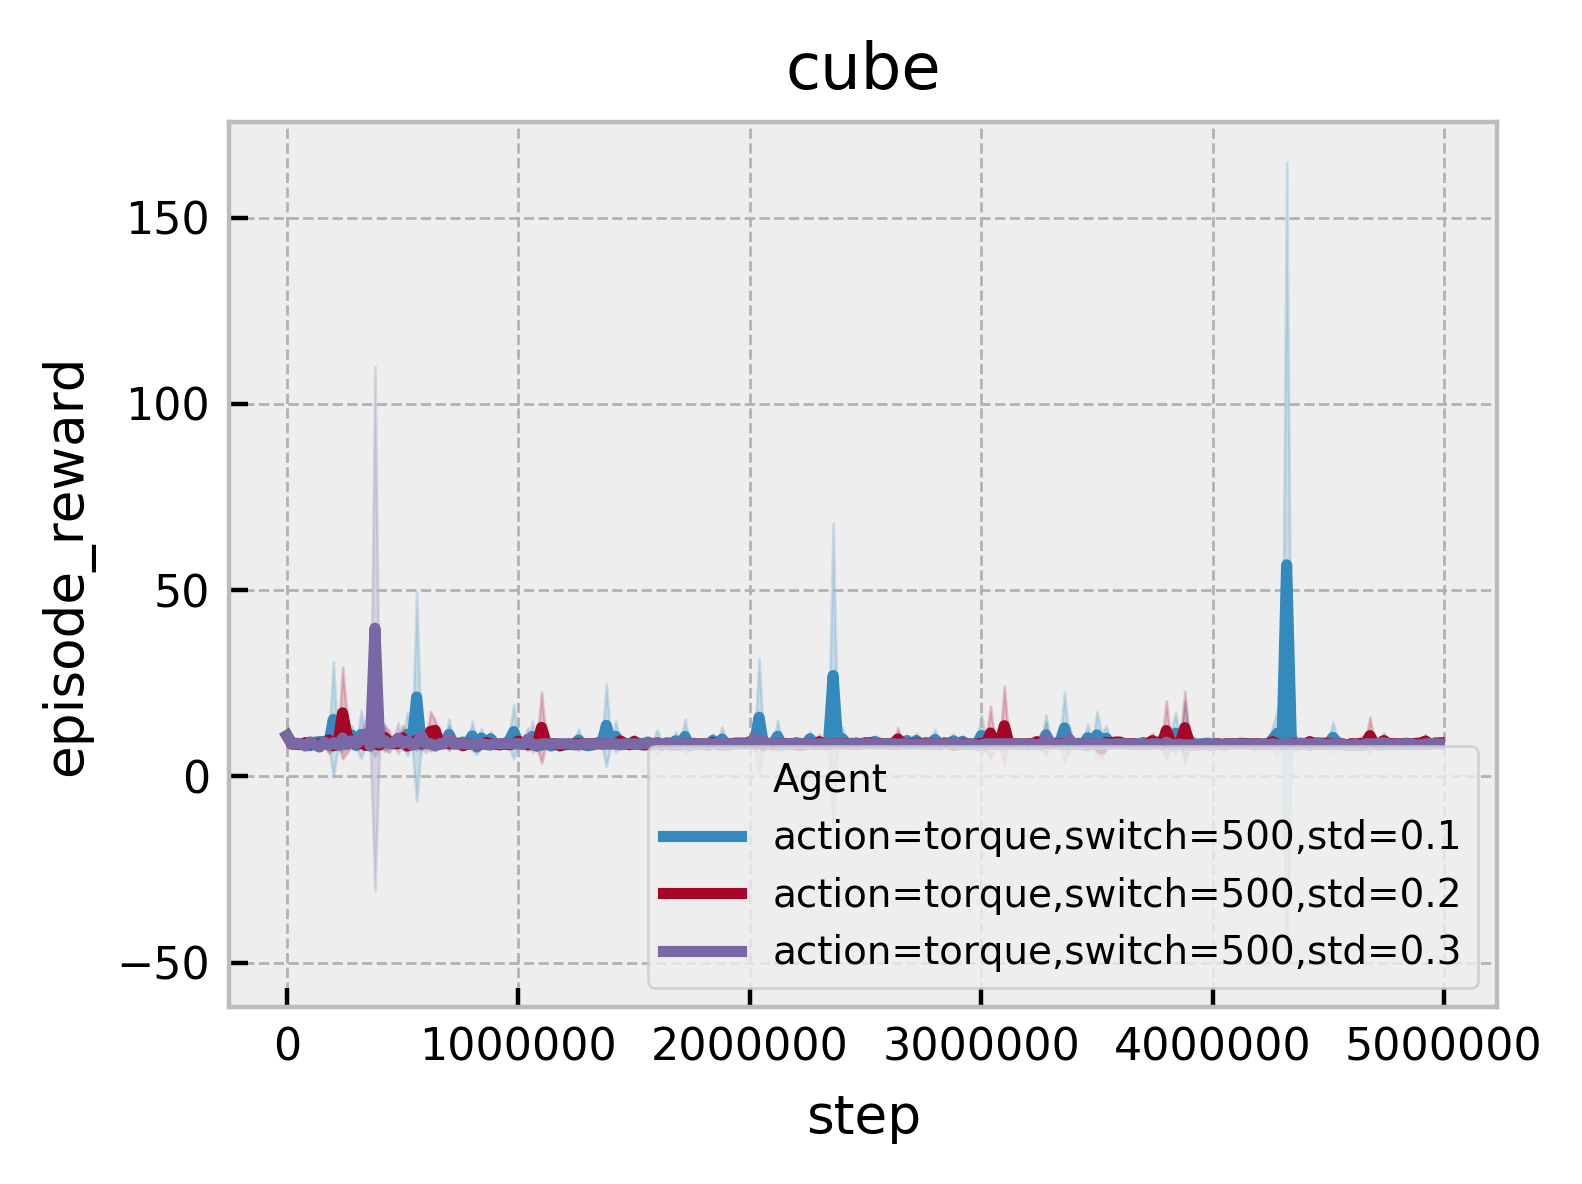

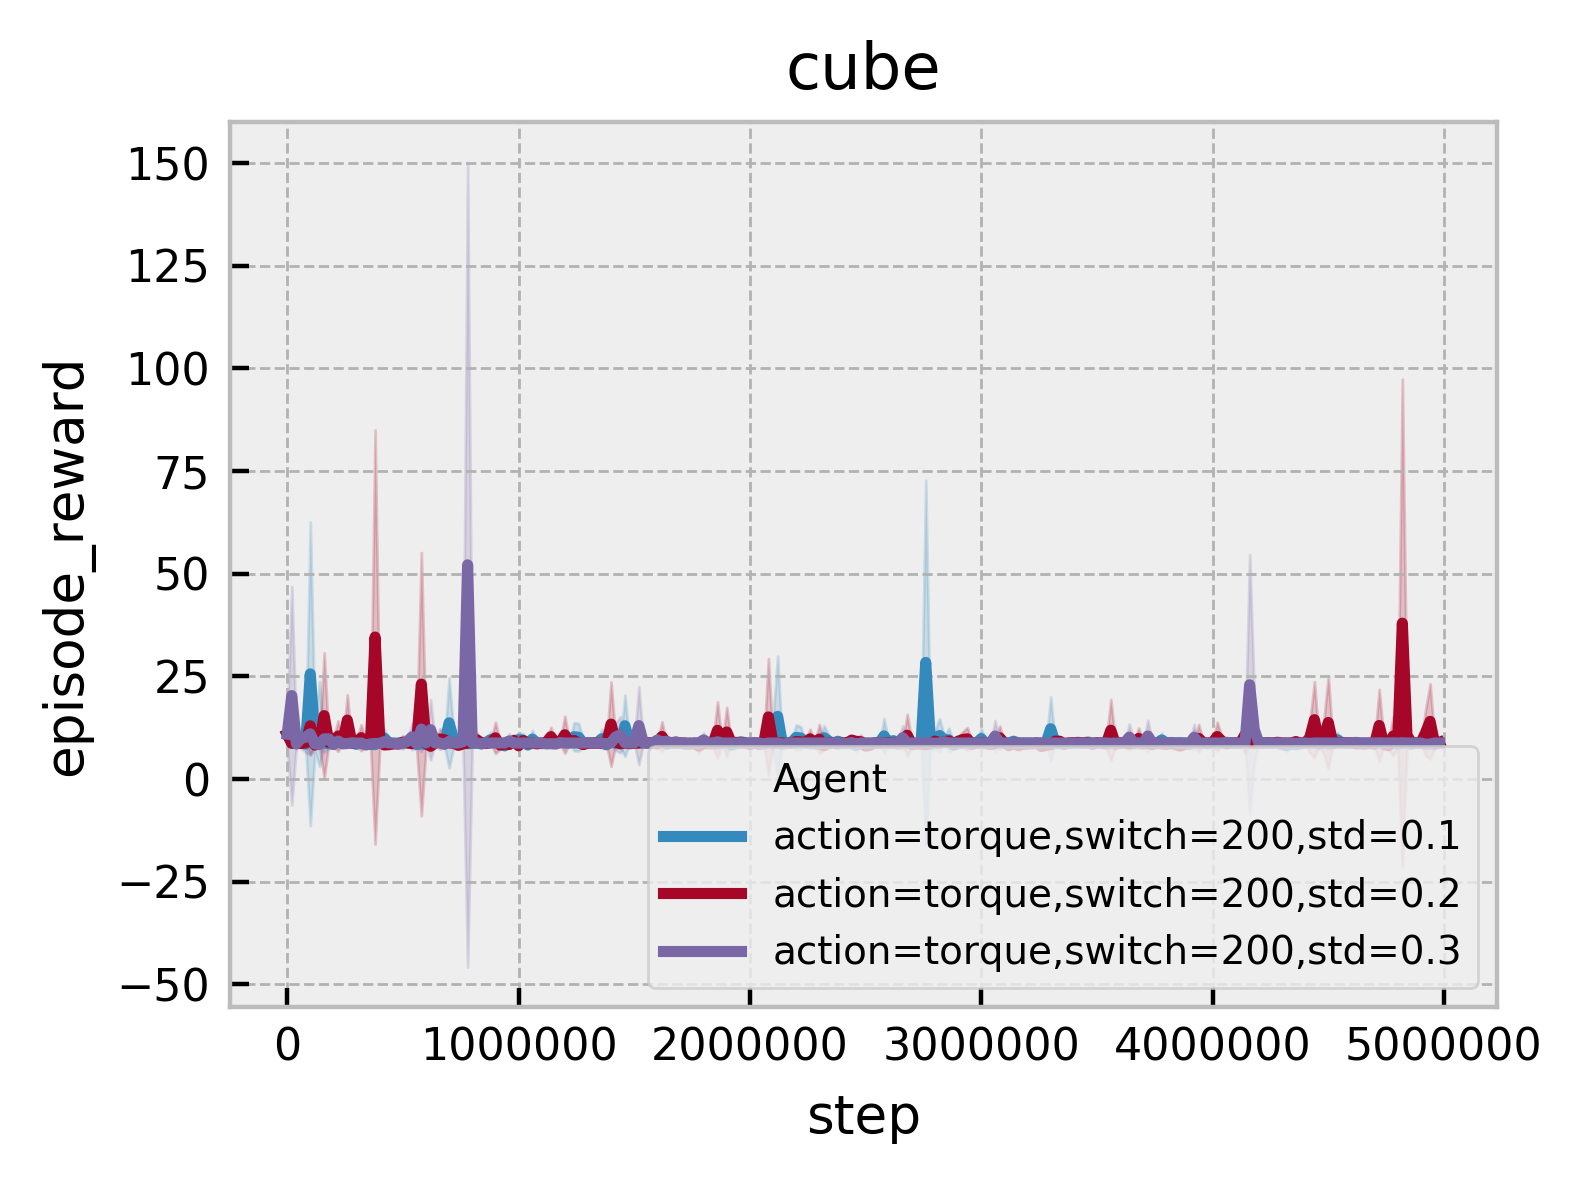

In [46]:
dfs = []

exp_dirs = [
    '../exp/2020.08.14/155926_ddpg_multi_cube_any_finger_no_reward_scaling',
]

for switch in [500, 200]:
    for aty in ['torque']:
        dfs = []
        for std in [0.1, 0.2, 0.3]:
            df = load_experiment(exp_dirs, ty='eval')
            df = df[df['fixed_env'] == str(True)]
            df = df[(df['switch_task_frequency'] == str(switch)) &(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
            df['Agent'] = f'action={aty},switch={switch},std={std}'
            dfs.append(df)

        df = pd.concat(dfs, sort=False)
        plot(df)
